In [1]:
import cvxpy as cp
from numpy import log2
from choi import * #custom
import matplotlib.pyplot as plt

We denote by $\mathcal{P}(\mathcal{H})$ the set of positive semidefinite operators acting on a Hilbert Space $\mathcal{H}$.

Let $\mathcal{N}: A \rightarrow B$ be a quantum channel with Choi operator $\tau_{AB}^\cal{N}$. 

Then
  
  \begin{align}
    \begin{aligned}
  \mathcal{Q}(\cal{N}) \leq \log \varGamma (\cal{N})
    \end{aligned}
   \end{align}
   
Where $\varGamma (\cal{N})$ is given by


  \begin{align}
    \begin{aligned}
    \text{minimize: }\mu \\ \text{subject to: } & \mu \in \mathbb{R} \\ & V_{AB}, Y_{AB} \in \mathcal{P}(\mathcal{H}_A \otimes \mathcal{H}_B) \\ & (V_{AB} - Y_{AB})^{T_B} \geq \tau_{AB}^\cal{N} \\ & V_A + Y_A \leq \mu {\mathbb{I}}_A
    \end{aligned}
   \end{align}

We solve this semidefinite program using PICOS.

In [5]:
d = 2
D = d**2

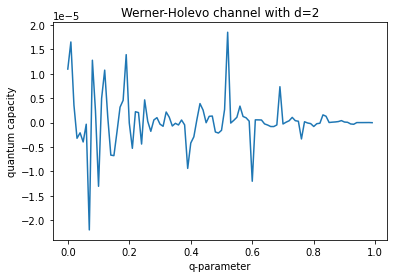

[1.096366978788308e-05, 1.6522455337570006e-05, 3.563159546268806e-06, -3.2290679651663017e-06, -2.1142309028345274e-06, -3.98691958623087e-06, -3.495620695799053e-07, -2.202478819053586e-05, 1.2777205430917308e-05, 2.3947285316470815e-06, -1.3079308780715603e-05, 4.9512744000242885e-06, 1.074393793260308e-05, 1.1428888647549602e-06, -6.6878805256180125e-06, -6.792464184422762e-06, -1.919217188136262e-06, 3.153762427144637e-06, 4.5497814541867054e-06, 1.3922660234603112e-05, -8.52820153249448e-08, -5.291236793920415e-06, 2.214915376905873e-06, 2.0361973539472256e-06, -4.4142708913552556e-06, 4.643636115493908e-06, 2.497220987502976e-07, -1.804831252261289e-06, 5.278988843895099e-07, 9.983258411463972e-07, -3.3677057756617524e-07, -7.717745237492873e-07, 2.15828850555783e-06, 1.089514978196877e-06, -7.096688975750894e-07, -1.6192496042137e-07, -5.016409536914541e-07, 5.178628747348073e-07, -4.794409695045931e-07, -9.405950297218485e-06, -4.206357660898429e-06, -2.931159876599789e-06, 6.

In [8]:
c = []
q_vals = np.array(range(100)) * 0.01

Vab = cp.Variable((D,D), symmetric=True)
Yab = cp.Variable((D,D), symmetric=True)
mu = cp.Variable()
iMat = np.identity(d)

Va = cp.partial_trace(Vab, (d,d), 1)
Ya = cp.partial_trace(Yab, (d,d), 1)

for q in q_vals:
    choi_mat = choi(d,q,wer_hol)
    constraints = [Vab >> 0]
    constraints += [Yab >> 0]
    constraints += [cp.partial_transpose(Vab - Yab, (d,d), 1) >> choi_mat]
    constraints += [Va + Ya << mu * iMat]
    prob = cp.Problem(cp.Minimize(mu),
                  constraints)
    prob.solve()
    c.append(log2(prob.value))
    

plt.plot(q_vals,c)

plt.title('Werner-Holevo channel with d=' + str(d))
plt.xlabel('q-parameter')
plt.ylabel('quantum capacity')

plt.show()

print(c)

In [9]:
#simple

d = 2
choi_mat = choi(d,0.01,wer_hol)



D = d**2
Vab = cp.Variable((D,D), symmetric=True)
Yab = cp.Variable((D,D), symmetric=True)
mu = cp.Variable()
iMat = np.identity(d)

Va = cp.partial_trace(Vab, (d,d), 1)
Ya = cp.partial_trace(Yab, (d,d), 1)

constraints = [Vab >> 0]
constraints += [Yab >> 0]

constraints += [cp.partial_transpose(Vab - Yab, (d,d), 1) >> choi_mat]

constraints += [Va + Ya << mu * iMat]

prob = cp.Problem(cp.Minimize(mu),
                  constraints)
prob.solve()

print(log2(prob.value))

1.6522455337570006e-05
